In [1]:
#mount point
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from collections import Counter
from sklearn.model_selection import train_test_split


In [0]:
#Reading the testing and Reading data
training_data = pd.read_csv('/content/drive/My Drive/q2/train.csv',header=None)
test_data = pd.read_csv('/content/drive/My Drive/q2/test.csv',header=None)
test_label_data = pd.read_csv('/content/drive/My Drive/q2/test_labels.csv',header=None)


In [0]:
#iterate in training data and replace the '?'.
temporary = training_data.mode(axis=0)
temporary_to_numpy = temporary.to_numpy()
incr=0
for col in training_data:
  if incr == 0:
    incr += 1
    continue
  training_data[col].replace("?",temporary_to_numpy[0][incr],inplace = True) 
  incr += 1   

In [0]:
training_data = pd.DataFrame(training_data).to_numpy()
test_data=pd.DataFrame(test_data).to_numpy()

In [0]:
#convert char to ascii value in training data
for x in range(0, training_data.shape[0]):
    for y in range(0, training_data.shape[1]):
        training_data[x,y] = ord(training_data[x,y])

In [0]:
##convert char to ascii value in test data
for x in range(0, test_data.shape[0]):
    for y in range(0, test_data.shape[1]):
        test_data[x,y] = ord(test_data[x,y])

In [0]:
#find the most frequent element in list , used for voting part in KNN
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 

In [0]:
##Now run the KNN algorithm in validation dat
train_data , validation_data = train_test_split(training_data,train_size = 0.8)

In [11]:
#Now run the KNN algorithm in validation data
k=3

result_data=[]
for j in range(len(validation_data)):
  local_k=[]
  for i in range(len(train_data)):
      
      distance = np.linalg.norm(train_data[i][1:] - validation_data[j][1:])
      # print(distance)
      # print(training_data[i][0])
      local_k.append((distance,train_data[i][0]))
      local_k.sort()
      if len(local_k) > k:
          local_k.pop()
  count_labels=[]
  for i in range(len(local_k)):
      count_labels.append(local_k[i][1])
  result_data.append(most_frequent(count_labels)) 
correct = 0
wrong = 0
for i in range(len(result_data)):
  if result_data[i] == validation_data[i][0]:
    correct += 1
  else:
    wrong += 1
print(correct)
print(wrong)

900
0


In [0]:
euclidean_ditance=[]
manhattam_diatance=[]

In [0]:
#calculating the accuracy on the basis of euclidean distance for different values of k = [3,5,7,9] 

In [27]:
#Now run the KNN algorithm on test data and compare it with test_label 
#before comparing it , convert it to char 
#and get the accuracy
k=3

result_data=[]
for j in range(len(test_data)):
  local_k=[]
  for i in range(len(train_data)):
      
      distance = np.linalg.norm(train_data[i][1:] - test_data[j])
      # print(distance)
      # print(training_data[i][0])
      local_k.append((distance,train_data[i][0]))
      local_k.sort()
      if len(local_k) > k:
          local_k.pop()
  count_labels=[]
  for i in range(len(local_k)):
      count_labels.append(local_k[i][1])
  result_data.append(most_frequent(count_labels))        
correct = 0
wrong = 0

for i in range(0,len(result_data)):
  result_data[i] = chr(result_data[i])

for i in range(len(result_data)):
  #print(result_data[i],test_label_data[0][i])
  if result_data[i] == test_label_data[0][i]:
    correct += 1
  else:
    wrong += 1
print(correct)
print(wrong)
accuracy=(correct/(correct+wrong))
print(accuracy)
euclidean_ditance.append(accuracy)   

1000
0
1.0


In [28]:
#Now run the KNN algorithm on test data and compare it with test_label 
#before comparing it , convert it to char 
#and get the accuracy
k=5

result_data=[]
for j in range(len(test_data)):
  local_k=[]
  for i in range(len(train_data)):
      
      distance = np.linalg.norm(train_data[i][1:] - test_data[j])
      # print(distance)
      # print(training_data[i][0])
      local_k.append((distance,train_data[i][0]))
      local_k.sort()
      if len(local_k) > k:
          local_k.pop()
  count_labels=[]
  for i in range(len(local_k)):
      count_labels.append(local_k[i][1])
  result_data.append(most_frequent(count_labels))        
correct = 0
wrong = 0

for i in range(0,len(result_data)):
  result_data[i] = chr(result_data[i])

for i in range(len(result_data)):
  #print(result_data[i],test_label_data[0][i])
  if result_data[i] == test_label_data[0][i]:
    correct += 1
  else:
    wrong += 1
print(correct)
print(wrong)
accuracy=(correct/(correct+wrong))
print(accuracy)
euclidean_ditance.append(accuracy)   

999
1
0.999


In [29]:
#Now run the KNN algorithm on test data and compare it with test_label 
#before comparing it , convert it to char 
#and get the accuracy
k=7

result_data=[]
for j in range(len(test_data)):
  local_k=[]
  for i in range(len(train_data)):
      
      distance = np.linalg.norm(train_data[i][1:] - test_data[j])
      # print(distance)
      # print(training_data[i][0])
      local_k.append((distance,train_data[i][0]))
      local_k.sort()
      if len(local_k) > k:
          local_k.pop()
  count_labels=[]
  for i in range(len(local_k)):
      count_labels.append(local_k[i][1])
  result_data.append(most_frequent(count_labels))        
correct = 0
wrong = 0

for i in range(0,len(result_data)):
  result_data[i] = chr(result_data[i])

for i in range(len(result_data)):
  #print(result_data[i],test_label_data[0][i])
  if result_data[i] == test_label_data[0][i]:
    correct += 1
  else:
    wrong += 1
print(correct)
print(wrong)
accuracy=(correct/(correct+wrong))
print(accuracy)
euclidean_ditance.append(accuracy)   

999
1
0.999


In [30]:
#Now run the KNN algorithm on test data and compare it with test_label 
#before comparing it , convert it to char 
#and get the accuracy
k=9

result_data=[]
for j in range(len(test_data)):
  local_k=[]
  for i in range(len(train_data)):
      
      distance = np.linalg.norm(train_data[i][1:] - test_data[j])
      # print(distance)
      # print(training_data[i][0])
      local_k.append((distance,train_data[i][0]))
      local_k.sort()
      if len(local_k) > k:
          local_k.pop()
  count_labels=[]
  for i in range(len(local_k)):
      count_labels.append(local_k[i][1])
  result_data.append(most_frequent(count_labels))        
correct = 0
wrong = 0

for i in range(0,len(result_data)):
  result_data[i] = chr(result_data[i])

for i in range(len(result_data)):
  #print(result_data[i],test_label_data[0][i])
  if result_data[i] == test_label_data[0][i]:
    correct += 1
  else:
    wrong += 1
print(correct)
print(wrong)
accuracy=(correct/(correct+wrong))
print(accuracy)
euclidean_ditance.append(accuracy)   

998
2
0.998


In [0]:
#now after calculating accuracy on the basis of euclidean distance, find on the basis of manhattam distance

In [33]:
#Now run the KNN algorithm on test data and compare it with test_label 
#before comparing it , convert it to char 
#and get the accuracy
k=3

result_data=[]
for j in range(len(test_data)):
  local_k=[]
  for i in range(len(train_data)):
      distance=np.sum(np.abs(train_data[i][1:] - test_data[j]))
     # distance = np.linalg.norm(train_data[i][1:] - test_data[j])
      # print(distance)
      # print(training_data[i][0])
      local_k.append((distance,train_data[i][0]))
      local_k.sort()
      if len(local_k) > k:
          local_k.pop()
  count_labels=[]
  for i in range(len(local_k)):
      count_labels.append(local_k[i][1])
  result_data.append(most_frequent(count_labels))        
correct = 0
wrong = 0

for i in range(0,len(result_data)):
  result_data[i] = chr(result_data[i])

for i in range(len(result_data)):
  #print(result_data[i],test_label_data[0][i])
  if result_data[i] == test_label_data[0][i]:
    correct += 1
  else:
    wrong += 1
print(correct)
print(wrong)
accuracy=(correct/(correct+wrong))
print(accuracy)
manhattam_diatance.append(accuracy)   

1000
0
1.0


In [34]:
#Now run the KNN algorithm on test data and compare it with test_label 
#before comparing it , convert it to char 
#and get the accuracy
k=5

result_data=[]
for j in range(len(test_data)):
  local_k=[]
  for i in range(len(train_data)):
      distance=np.sum(np.abs(train_data[i][1:] - test_data[j]))
     # distance = np.linalg.norm(train_data[i][1:] - test_data[j])
      # print(distance)
      # print(training_data[i][0])
      local_k.append((distance,train_data[i][0]))
      local_k.sort()
      if len(local_k) > k:
          local_k.pop()
  count_labels=[]
  for i in range(len(local_k)):
      count_labels.append(local_k[i][1])
  result_data.append(most_frequent(count_labels))        
correct = 0
wrong = 0

for i in range(0,len(result_data)):
  result_data[i] = chr(result_data[i])

for i in range(len(result_data)):
  #print(result_data[i],test_label_data[0][i])
  if result_data[i] == test_label_data[0][i]:
    correct += 1
  else:
    wrong += 1
print(correct)
print(wrong)
accuracy=(correct/(correct+wrong))
print(accuracy)
manhattam_diatance.append(accuracy)   

1000
0
1.0


In [35]:
#Now run the KNN algorithm on test data and compare it with test_label 
#before comparing it , convert it to char 
#and get the accuracy
k=7

result_data=[]
for j in range(len(test_data)):
  local_k=[]
  for i in range(len(train_data)):
      distance=np.sum(np.abs(train_data[i][1:] - test_data[j]))
     # distance = np.linalg.norm(train_data[i][1:] - test_data[j])
      # print(distance)
      # print(training_data[i][0])
      local_k.append((distance,train_data[i][0]))
      local_k.sort()
      if len(local_k) > k:
          local_k.pop()
  count_labels=[]
  for i in range(len(local_k)):
      count_labels.append(local_k[i][1])
  result_data.append(most_frequent(count_labels))        
correct = 0
wrong = 0

for i in range(0,len(result_data)):
  result_data[i] = chr(result_data[i])

for i in range(len(result_data)):
  #print(result_data[i],test_label_data[0][i])
  if result_data[i] == test_label_data[0][i]:
    correct += 1
  else:
    wrong += 1
print(correct)
print(wrong)
accuracy=(correct/(correct+wrong))
print(accuracy)
manhattam_diatance.append(accuracy)   

1000
0
1.0


In [36]:
#Now run the KNN algorithm on test data and compare it with test_label 
#before comparing it , convert it to char 
#and get the accuracy
k=9

result_data=[]
for j in range(len(test_data)):
  local_k=[]
  for i in range(len(train_data)):
      distance=np.sum(np.abs(train_data[i][1:] - test_data[j]))
     # distance = np.linalg.norm(train_data[i][1:] - test_data[j])
      # print(distance)
      # print(training_data[i][0])
      local_k.append((distance,train_data[i][0]))
      local_k.sort()
      if len(local_k) > k:
          local_k.pop()
  count_labels=[]
  for i in range(len(local_k)):
      count_labels.append(local_k[i][1])
  result_data.append(most_frequent(count_labels))        
correct = 0
wrong = 0

for i in range(0,len(result_data)):
  result_data[i] = chr(result_data[i])

for i in range(len(result_data)):
  #print(result_data[i],test_label_data[0][i])
  if result_data[i] == test_label_data[0][i]:
    correct += 1
  else:
    wrong += 1
print(correct)
print(wrong)
accuracy=(correct/(correct+wrong))
print(accuracy)
manhattam_diatance.append(accuracy)   

1000
0
1.0


In [59]:
man_list = []
euclidean_list=[]

for i in range(1 , len(euclidean_ditance)):
  euclidean_list.append(euclidean_ditance[i])

man_list=[]
man_list.append(1)
man_list.append(1)
man_list.append(1)
man_list.append(1)
print(len(euclidean_list),len(man_list))

4 4


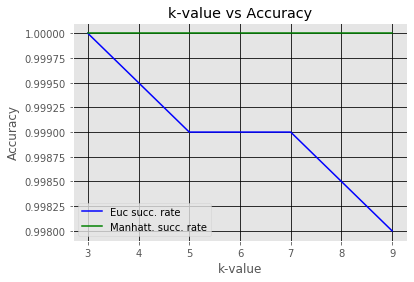

In [60]:
#graph for accuracy on different values of K[3,5,7,9] on the basis of Eucledian Distance,
#and manhattan Distance
k=[3,5,7,9]
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

plt.title("k-value vs Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('k-value')


plt.plot(k,euclidean_list,'b', label="Euc succ. rate")
plt.plot(k,man_list,'g', label="Manhatt. succ. rate")
plt.legend()
plt.grid(True, color='k')
plt.show()